In [24]:
import os
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def read_csv_files(directories):
    """
    Read all of the CSV files in the specified directories.

    Args:
        directories: A comma-separated string of directories that contain the CSV files.

    Returns:
        A list of DataFrames, one for each CSV file.
    """

    dataframes = []
    for directory in directories.split(','):
        csv_files = os.listdir(directory.strip())
        for csv_file in csv_files:
            if csv_file.lower().endswith('.csv'):
                dataframe = pd.read_csv(os.path.join(directory.strip(), csv_file))
                dataframes.append(dataframe)

    return dataframes

def train_rul_model(X_train, y_train):
    """
    Train a Random Forest Regressor model on the given data.

    Args:
        X_train: The feature matrix for training.
        y_train: The target variable vector for training.

    Returns:
        The trained Random Forest Regressor model.
    """

    # Create and train the Random Forest Regressor
    rul_model = RandomForestRegressor(random_state=42)
    rul_model.fit(X_train, y_train)

    return rul_model

def main():
    # Get the list of CSV files in the directory
    directory = "/content/drive/MyDrive/fsm/Learning_set/Bearing1_1,/content/drive/MyDrive/fsm/Learning_set/Bearing1_2"
    csv_files = read_csv_files(directory)

    # Loop over the CSV files and train a model on each one
    for data in csv_files:
        # Print column names to find the correct name of the target variable (RUL) column
        print(data.columns)

        # Assume the target variable is in the last column (index -1)
        target_column_index = -1
        X = data.drop(data.columns[target_column_index], axis=1)
        y = data[data.columns[target_column_index]]

        # Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the data and transform
        X_imputed = imputer.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train the RUL prediction model and get the trained model
        rul_model = train_rul_model(X_train, y_train)

        # Evaluate the model's performance on the test set (e.g., using R-squared score)
        score = rul_model.score(X_test, y_test)
        print("R-squared score:", score)

if __name__ == "__main__":
    main()


Streaming output truncated to the last 5000 lines.
Index(['15', '37', '9', '65664', '-0.618', '0.048'], dtype='object')
R-squared score: -0.178248750445821
Index(['10', '28', '59', '65664', '-0.213', '-0.574'], dtype='object')
R-squared score: -0.16863921839437146
Index(['11', '9', '29', '65664', '-0.41', '-0.115'], dtype='object')
R-squared score: -0.1198678063266847
Index(['11', '57', '19', '65664', '0.192', '0.07'], dtype='object')
R-squared score: -0.2957559278031736
Index(['12', '21', '29', '65664', '0.081', '0.041'], dtype='object')
R-squared score: -0.18301412783758408
Index(['12', '17', '39', '65664', '-0.224', '0.313'], dtype='object')
R-squared score: -0.2809368558002341
Index(['12', '9', '19', '65664', '-0.934', '0.352'], dtype='object')
R-squared score: -0.1637466927397817
Index(['17', '25', '39', '65664', '-1.298', '1.445'], dtype='object')
R-squared score: -0.16046140913307538
Index(['11', '46', '9', '65664', '0.17', '-0.143'], dtype='object')
R-squared score: -0.11311809

Index(['13', '3', '51', '3.7816e+05', '-0.482', '0.072'], dtype='object')
R-squared score: -0.25573876156475084
Index(['8', '41', '21', '3.7816e+05', '-0.62', '0.059'], dtype='object')
R-squared score: -0.14580691870962692
Index(['10', '25', '41', '3.7816e+05', '-0.474', '-0.017'], dtype='object')
R-squared score: -0.21466050720750673
Index(['11', '41', '1', '3.7816e+05', '-0.118', '0.036'], dtype='object')
R-squared score: -0.18000754652630246
Index(['13', '28', '41', '3.7816e+05', '0.084', '0.813'], dtype='object')
R-squared score: 0.8736024596007995
Index(['10', '13', '1', '3.7816e+05', '-0.195', '-0.792'], dtype='object')
R-squared score: -0.23441741887264067
Index(['13', '20', '1', '3.7816e+05', '-0.156', '-0.17'], dtype='object')
R-squared score: 0.9182045616660328
Index(['12', '34', '21', '3.7816e+05', '0.001', '-0.74'], dtype='object')
R-squared score: -0.276010603863976
Index(['8', '55', '41', '3.7816e+05', '-0.067', '0.156'], dtype='object')
R-squared score: -0.28303986695110

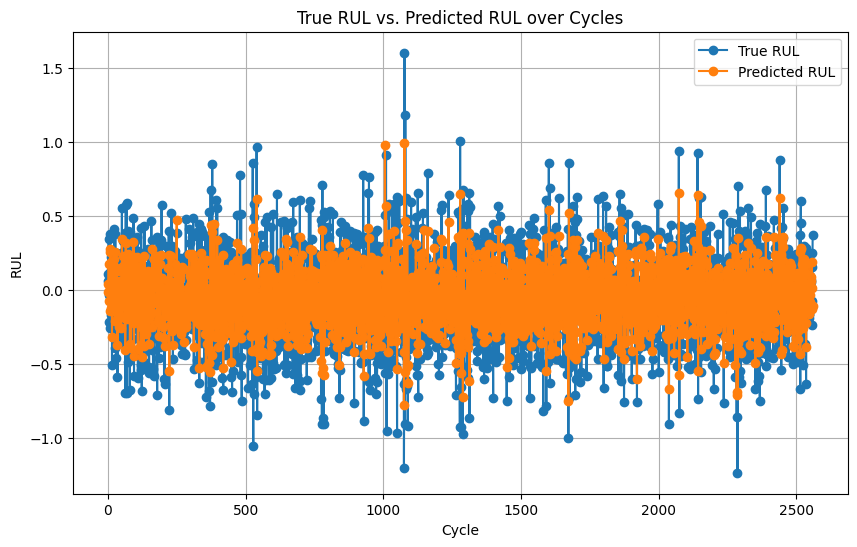

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def read_csv_files(directory):
    """
    Read all of the CSV files in the specified directory.

    Args:
        directory: The directory that contains the CSV files.

    Returns:
        A list of DataFrames, one for each CSV file.
    """

    csv_files = os.listdir(directory)
    dataframes = []
    for csv_file in csv_files:
        dataframe = pd.read_csv(os.path.join(directory, csv_file))
        dataframes.append(dataframe)

    return dataframes
def plot_rul_prediction(data):
    """
    Plot the RUL predictions against the true RUL values over cycles.

    Args:
        data: DataFrame containing the predicted and true RUL values.
    """

    plt.figure(figsize=(10, 6))

    # Create a new column 'Cycle' representing the cycle number for each row
    data['Cycle'] = range(1, len(data) + 1)

    # Plot True RUL and Predicted RUL over cycles
    plt.plot(data['Cycle'], data['True RUL'], label='True RUL', marker='o')
    plt.plot(data['Cycle'], data['Predicted RUL'], label='Predicted RUL', marker='o')

    plt.xlabel('Cycle')
    plt.ylabel('RUL')
    plt.title('True RUL vs. Predicted RUL over Cycles')
    plt.legend()
    plt.grid(True)
    plt.show()


def train_main():
    # Get the list of CSV files in the directory
    directory = "/content/drive/MyDrive/fsm/Test_set/Bearing1_3"
    csv_files = read_csv_files(directory)

    # Loop over the CSV files and train a model on each one
    for csv_file in csv_files:
        data = csv_file

        # Print column names to find the correct name of the target variable (RUL) column
        print(data.columns)

        # Assume the target variable is in the last column (index -1)
        target_column_index = -1
        X = data.drop(data.columns[target_column_index], axis=1)
        y = data[data.columns[target_column_index]]

        # Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the data and transform
        X_imputed = imputer.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train the RUL prediction model
        rul_model = train_rul_model(X_train, y_train)

        # Evaluate the model's performance on the test set (e.g., using mean squared error)
        score = rul_model.score(X_test, y_test)
        print("R-squared score:", score)

        # Add the predicted RUL values to the DataFrame
        data['Predicted RUL'] = rul_model.predict(X_imputed)
        data['True RUL'] = y

    return data

if __name__ == "__main__":
    data = train_main()
    plot_rul_prediction(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(data.columns)


In [ ]:
print(data.head(20))
